# Exercise 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from time import time

In [2]:
class Particles:
    
    # constants
    a = 7
    de = 1
    re = 1
    sx = 8
    sy = 16
    sz = 8
    sigma = 1/1.12246204831
    
    # Initialization ################################################################
    def __init__(self, num, x0, v0):
        self.num = num
        self.x = x0
        self.v = v0
        self.mVect = np.ones(num)
        #self.mVect = np.linspace(start=1, stop=100, num=num)
        # self.mVect[0:5] = 50
        
    
    # Accelerations ################################################################
    def accelerations(self, r, m):
        rnorm = np.linalg.norm(r, axis=1) # magnutide of r
        # print(rnorm)
        temp = np.exp(-self.a*(rnorm-self.re)) # temporary var
        f = 2*self.a*self.de * (temp**2 - temp) # force magnitude
        # print(f)
        fvect = np.transpose(f * np.transpose(r) / rnorm)
        # print(fvect)
        fsum = np.sum(fvect, axis=0)
        # print(f'fsum is {fsum}')
        return fsum/m
    
    # for plotting
    def morseValues(self, r):
        V = self.de * (np.exp(-2*self.a*(r-self.re))-2*np.exp(-self.a*(r-self.re)))
        return V
    
    def jonesValues(self, r):
        temp = (self.sigma / r) ** 6
        V = 4 * (temp **2 - temp)
        return V
    
    # cromer
    def cromer(self, x, v, f, del_t):
        v = v + del_t * f
        x = x + del_t * v
        return [x, v]
    
#     def velocityVerlet(self, x, v, f, del_t):
#         v = v + f * del_t / 2
#         x = x + v * del_t
#         v = v + f * del_t / 2
#         return [x, v]
    
    # Update Positions #############################################################
    def updatePositions(self, del_t = 0.01, annealing = 1.0):
        f = np.zeros((self.num,3))
        for i in range(self.num):
            
            # xyz of all other particles
            others = np.delete(self.x, i, axis=0)
            # print(others)
            # self particle repeated and reshaped to fit others vector
            ref = np.reshape(np.tile(self.x[i], self.num-1), np.shape(others))
            # print(ref)
            
            # r = distance vector to nearest pair
            r =  others - ref
            # print(f'radius vector:\r\n{r}')
            r[:,0] = np.mod(r[:,0], self.sx)
            r[:,1] = np.mod(r[:,1], self.sy)
            r[:,2] = np.mod(r[:,2], self.sz)
            for l in range(np.shape(r)[0]):
                if r[l,0] > self.sx / 2:
                    r[l,0] = r[l,0] - self.sx
                if r[l,1] > self.sy / 2:
                    r[l,1] = r[l,1] - self.sy
                if r[l,2] > self.sz / 2:
                    r[l,2] = r[l,2] - self.sz

            # print(f'radius vector after formatting:\r\n{r}')

            # update positions according to cromer algorithm
            f[i] = self.accelerations(r, self.mVect[i])
        
        # simulated annealing version
        [self.x[:], self.v[:]] = self.cromer(self.x[:], np.multiply(self.v[:],annealing), -f[:], del_t)

        # ensure the particles new positions are stored inside of the bounding box
        self.x[:,0] = np.mod(self.x[:,0], self.sx)
        self.x[:,1] = np.mod(self.x[:,1], self.sy)
        self.x[:,2] = np.mod(self.x[:,2], self.sz)
        
        # print(f'x: {self.x}')
        # print(f'v: {self.v}')

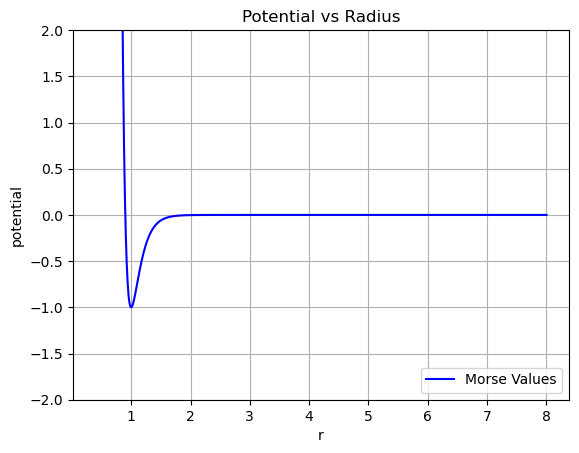

In [3]:
xAxis = np.linspace(Particles.sx/20, Particles.sx, 1000)
yAxis = Particles.morseValues(Particles, xAxis)

fig = plt.figure()
plt.plot(xAxis, yAxis, 'b', label='Morse Values')
plt.title('Potential vs Radius')
plt.xlabel('r')
plt.ylabel('potential')
plt.ylim([-2*Particles.de,2*Particles.de])
plt.grid()
plt.legend(loc='lower right')
plt.show()

## Initialization

In [4]:
def cubicLattice(l):
    coords = np.zeros((l**3,3))
    for i in range(l):
        for j in range(l):
            for k in range(l):
                coords[i*l**2+j*l+k] = [i,j,k]
    return coords

In [5]:
def hcpLattice(lx, ly, lz):
    coords = np.zeros((lx*ly*lz,3))
    for i in range(lz):
        for j in range(ly):
            for k in range(lx):
                coords[i*ly*lx+j*lx+k] = [k,j*np.sqrt(3)/2,i*np.sqrt(2/3)]
                if (j % 2 == 1):
                    coords[i*ly*lx+j*lx+k,0] = coords[i*ly*lx+j*lx+k,0] + 0.5
                if (i % 2 == 1):
                    coords[i*ly*lx+j*lx+k,1] = coords[i*ly*lx+j*lx+k,1] + 1/np.sqrt(12)
                    if (j % 2 == 1):
                        coords[i*ly*lx+j*lx+k,0] = coords[i*ly*lx+j*lx+k,0] - 0.5
                    else:
                        coords[i*ly*lx+j*lx+k,0] = coords[i*ly*lx+j*lx+k,0] + 0.5
    # plt.scatter(coords[:,0], coords[:,1])
    return coords

print(hcpLattice(2, 3, 4))

[[0.         0.         0.        ]
 [1.         0.         0.        ]
 [0.5        0.8660254  0.        ]
 [1.5        0.8660254  0.        ]
 [0.         1.73205081 0.        ]
 [1.         1.73205081 0.        ]
 [0.5        0.28867513 0.81649658]
 [1.5        0.28867513 0.81649658]
 [0.         1.15470054 0.81649658]
 [1.         1.15470054 0.81649658]
 [0.5        2.02072594 0.81649658]
 [1.5        2.02072594 0.81649658]
 [0.         0.         1.63299316]
 [1.         0.         1.63299316]
 [0.5        0.8660254  1.63299316]
 [1.5        0.8660254  1.63299316]
 [0.         1.73205081 1.63299316]
 [1.         1.73205081 1.63299316]
 [0.5        0.28867513 2.44948974]
 [1.5        0.28867513 2.44948974]
 [0.         1.15470054 2.44948974]
 [1.         1.15470054 2.44948974]
 [0.5        2.02072594 2.44948974]
 [1.5        2.02072594 2.44948974]]


In [6]:
# def fccLattice():
#     atoms = 64
#     temp = np.arange(atoms).reshape(atoms, 1)
#     xyz_coordinates = np.concatenate((temp % 4, np.floor(temp / 4) % 4, np.floor(temp / 16) % 4), axis=1)
#     vel_coordinates = np.ones((atoms,3))
#     vel_coordinates = np.append(0.25 * np.ones((atoms,3)), -0.25 * np.ones((atoms,3)), axis=0)
#     # print(np.max(xyz_coordinates))
    
#     xyz_coordinates2 = np.zeros_like(xyz_coordinates)
#     xyz_coordinates2[:,0] = xyz_coordinates[:,1] + xyz_coordinates[:,2]
#     xyz_coordinates2[:,1] = xyz_coordinates[:,0] + xyz_coordinates[:,2]
#     xyz_coordinates2[:,2] = xyz_coordinates[:,0] + xyz_coordinates[:,1]
#     xyz_coordinates2 = xyz_coordinates2 * 2 **(-1/2) #* 0.9428568433918427
#     # print(np.linalg.norm(xyz_coordinates2, axis=1))
    
#     xyz_coordinates = np.append(xyz_coordinates, xyz_coordinates2+4, axis=0)
#     xyz_coordinates = xyz_coordinates + Particles.sx / 2 - np.max(xyz_coordinates) / 2
    
#     xyz_coordinates = np.asarray(xyz_coordinates)
#     p = Particles(atoms*2, xyz_coordinates, vel_coordinates)
#     # example acceleration
#     # Particles.accelerations(Particles, np.asarray([.0001,0,0]))

In [7]:
#HPC

atoms = 150

lattice1 = hcpLattice(5, 3, 5) 

# swap x and y
lattice2 = hcpLattice(3, 5, 5) 
lattice2[:,[0,1]] = lattice2[:,[1,0]]

# center the particles
# coords = coords + Particles.sx / 2 - np.max(coords) / 2
lattice1 = lattice1 + Particles.sx / 2 - np.max(lattice1) / 2
lattice2 = lattice2 + Particles.sx / 2 - np.max(lattice2) / 2 + [0.5, 6, 0]

coords = np.concatenate((lattice1, lattice2), axis=0)

coords = coords + [0, 1, 0]

#initialize velocity
vel_coordinates = np.zeros_like(coords)
vel_coordinates[0:int(atoms/2),1] = 0.25
vel_coordinates[int(atoms/2):-1,1] = -0.25

# add on a bullet particle
#coords = np.append(coords, [[4,16,3]], axis=0)
#vel_coordinates = np.append(vel_coordinates, [[0,-10,0]], axis=0)
p = Particles(atoms, coords, vel_coordinates)

## Update Positions using Cromer from the Particles Class
save positions and velocities to the state vector

In [8]:
steps = 1000
del_t = 0.019
state = np.zeros((steps*4,2,p.num,3))
# print(p.x)
state[0] = [p.x, p.v]

In [9]:
tstart = time()
j = 0
for i in range(steps):
    p.updatePositions(del_t, annealing = 1)
    state[j] = [p.x, p.v]
    j = j+1
    
for i in range(int(steps/4)):
    p.updatePositions(del_t, annealing = 0.99)
    state[j] = [p.x, p.v]
    j = j+1
for i in range(int(steps/4)):
    p.updatePositions(del_t, annealing = 1)
    state[j] = [p.x, p.v]
    j = j+1
for i in range(int(steps/2)):
    p.updatePositions(del_t, annealing = 1/0.9932)
    state[j] = [p.x, p.v]
    j = j+1
    
# for i in range(int(steps/4)):
#     p.updatePositions(del_t, annealing = 1.0015)
#     state[j] = [p.x, p.v]
#     j = j+1
    
# for i in range(int(steps/4)):
#     p.updatePositions(del_t, annealing = 1)
#     state[j] = [p.x, p.v]
#     j = j+1
    
for i in range(int(steps*1.5)):
    p.updatePositions(del_t, annealing = 0.99935)
    state[j] = [p.x, p.v]
    j = j+1
    
for i in range(int(steps/4)):
    p.updatePositions(del_t, annealing = 0.99)
    state[j] = [p.x, p.v]
    j = j+1
for i in range(int(steps/4)):
    p.updatePositions(del_t, annealing = 1)
    state[j] = [p.x, p.v]
    j = j+1
    
print(f'{(time() - tstart)}s')

215.79039120674133s


<IPython.core.display.Javascript object>


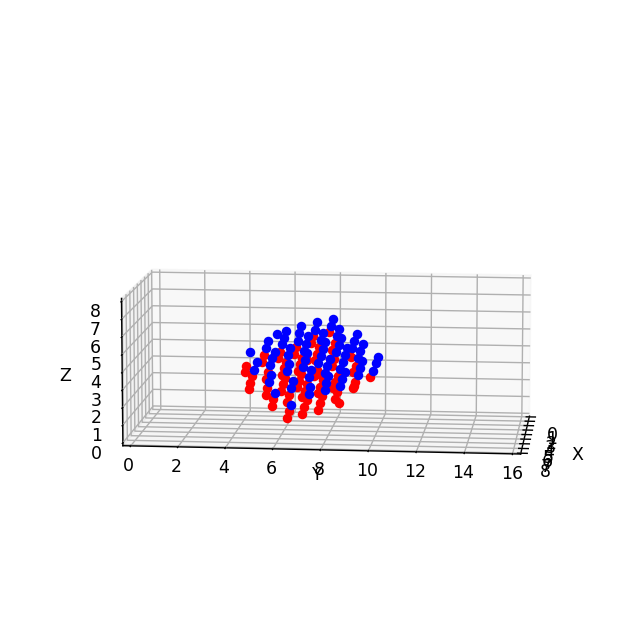

60.06626915931702s


In [30]:
%matplotlib notebook
#from mpl_toolkits.mplot3d import proj3d

def animate_scatters(iteration, data, scatters):
    """
    Update the data held by the scatter plot and therefore animates it.
    Args:
        iteration (int): Current iteration of the animation
        data (list): List of the data positions at each iteration.
        scatters (list): List of all the scatters (One per element)
    Returns:
        list: List of scatters (One per element) with new coordinates
    """
    for i in range(p.num):
        scatters[i]._offsets3d = (data[iteration,i,0:1], data[iteration,i,1:2], data[iteration,i,2:])
    return scatters

def plotParticles(data, save=False):
    """
    Creates the 3D figure and animates it with the input data.
    Args:
        data (list): List of the data positions at each iteration.
        save (bool): Whether to save the recording of the animation. (Default to False).
    """

    # Attaching 3D axis to the figure
    fig = plt.figure(figsize=(5,5))
    ax = p3.Axes3D(fig, auto_add_to_figure=False )
    fig.add_axes(ax)
    
    # Scale axis
    scale=np.asarray([p.sx,p.sy,p.sz])
    scale = scale / np.max(scale)

#     scale=np.diag([x_scale, y_scale, z_scale, 1.0])
#     scale=scale*(1.0/scale.max())
#     scale[3,3]=1.0
#     print(scale)
#     print(p3.Axes3D.get_proj(ax))
#     print(np.dot(np.asarray(p3.Axes3D.get_proj(ax)), scale))

#     ax.get_proj=np.dot(np.asarray(p3.Axes3D.get_proj(ax)), scale)
    ax.get_proj = lambda: np.dot(p3.Axes3D.get_proj(ax), np.diag([scale[0], scale[1], scale[2], 1]))

    # Initialize scatters
    maxMass = max(p.mVect)
    normMass = p.mVect / maxMass
    # colors = [ (normMass[i], 0, 1 - normMass[i]) for i in range(p.num) ]
    colors = np.zeros((p.num+1,3))
    colors[0:int(p.num/2), 0] = 1
    colors[int(p.num/2):-1, 2] = 1
    # print(colors)
    scatters = [ ax.scatter(data[0,i,0:1], data[0,i,1:2], data[0,i,2:], color=colors[i]) for i in range(p.num) ]

    # Number of iterations
    iterations = np.shape(data)[0]

    # Setting the axes properties
    ax.set_xlim3d([0, p.sx])
    ax.set_xlabel('X')

    ax.set_ylim3d([0, p.sy])
    ax.set_ylabel('Y')

    ax.set_zlim3d([0, p.sz])
    ax.set_zlabel('Z')

    ax.set_title('3D Scatter')

    # Provide starting angle for the view.
    # ax.view_init(5, 5)
    # top view
    # ax.view_init(85, 0)
    # axis veiw
    ax.view_init(9, 6)

    ani = animation.FuncAnimation(fig, animate_scatters, iterations, fargs=(data, scatters),
                                       interval=50, blit=False, repeat=True)

    if save:
        writer = animation.PillowWriter(fps=15,metadata=dict(artist='Me'),bitrate=1800)
        ani.save('3d-scatted.gif', writer=writer)

    plt.show()
    
tstart = time()
plotParticles(state[::40,0,:,:], save=True)
print(f'{(time() - tstart)}s')
# temp = state[:,0,:,:]
# print(temp[0,0,0:1])
# print(temp[0,0,1:2])
# print(temp[0,0,2:])

## Question 4

In [11]:

%matplotlib inline
# fill in radius vectors
import itertools

l = np.shape(state)[0]
radius = np.zeros((l,p.num,p.num-1,3))

print(np.shape(radius))
for i in range(p.num):
    refPos = state[:,0,i,:]
    others = np.delete(state[:,0,:,:], i, axis=1)
    for j in range(p.num-1):
        radius[:,i,j,:]= others[:,j,:] - refPos[:,:]

radius[:,:,:,0] = np.mod(radius[:,:,:,0], p.sx)
radius[:,:,:,1] = np.mod(radius[:,:,:,1], p.sy)
radius[:,:,:,2] = np.mod(radius[:,:,:,2], p.sz)

shape = np.shape(radius)
for i,j,k in itertools.product(range(shape[0]),range(shape[1]),range(shape[2])):
    if radius[i,j,k,0] > p.sx / 2:
        radius[i,j,k,0] = radius[i,j,k,0] - p.sx
    if radius[i,j,k,1] > p.sy / 2:
        radius[i,j,k,1] = radius[i,j,k,1] - p.sy
    if radius[i,j,k,2] > p.sz / 2:
        radius[i,j,k,2] = radius[i,j,k,2] - p.sz
        
print(np.shape(others))

(4000, 150, 149, 3)
(4000, 149, 3)


In [12]:
np.mod(-2.9,3)

0.10000000000000009

In [13]:
# element-wise norm
def element_norm(x):
    mag = np.sum(np.square(x), axis=-1)
    return np.sqrt(mag)

In [14]:
EpVect = 0.5 * Particles.morseValues(Particles, element_norm(radius))
Ep = np.sum(EpVect, axis=(1,2))
EkVect = 0.5 * p.mVect * element_norm(state[:,1,:,:])**2
Ek = np.sum(EkVect, axis=1)

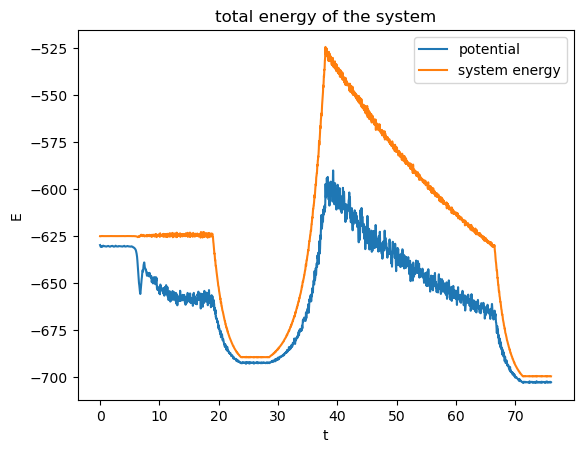

In [20]:
xAxis = np.linspace(0, l*del_t, l)

# plot the potential energy results
plt.plot(xAxis, Ep, label = "potential")
# plt.plot(xAxis, Ep-Ep[0]-Ek[0], label = "potential")
plt.title('potential energy')
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='lower right')
plt.grid()
#plt.show()

# plot the kinetic energy results
# plt.plot(xAxis, Ek, label = "kinetic")
# plt.title('kinetic energy')
# plt.xlabel('t')
# plt.ylabel('E')
# plt.legend(loc='lower right')
# plt.grid()
#plt.show()


# plot the energy results per particle
plt.plot(xAxis, Ek + Ep, label = "system energy")
# plt.plot(xAxis, Ek + Ep - Ep[0] - Ek[0], label = "system energy")
plt.title('total energy of the system')
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [16]:
sys = Ek + Ep
print(np.min(sys[0:int(l/2)]))
print(np.min(sys[int(l/2):-1]))

-689.3952618794016
-699.4894926605165


(4000, 150, 149, 3)
(2235000,)


(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

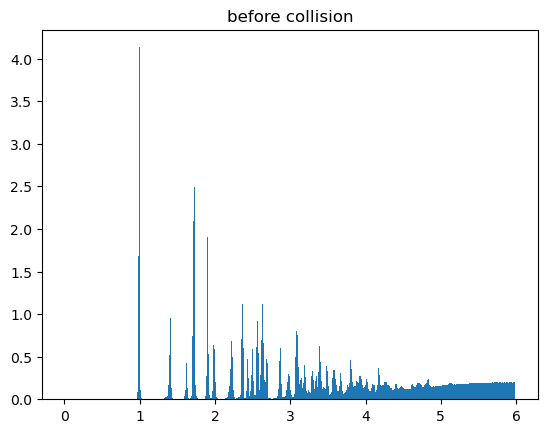

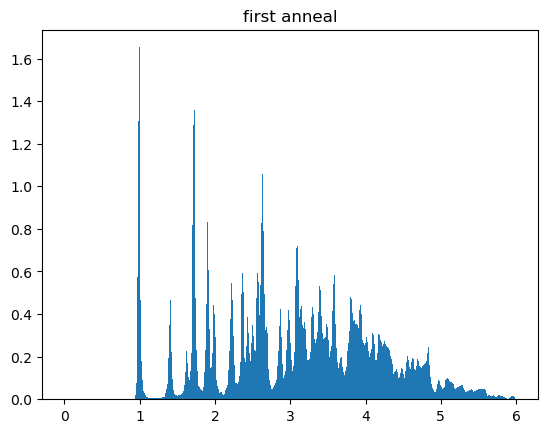

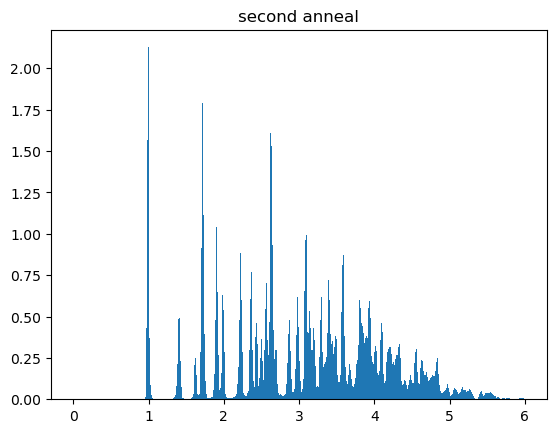

In [29]:
# pair correlation function
print(np.shape(radius))
rad1 = np.ndarray.flatten(element_norm(radius[0:264]))
rad2 = np.ndarray.flatten(element_norm(radius[1157:1526]))
rad3 = np.ndarray.flatten(element_norm(radius[3790:-1]))
print(np.shape(rad))

plt.title("before collision")
plt.hist(rad1, np.arange(0,6,0.01), density=True)
plt.figure()
plt.title("first anneal")
plt.hist(rad2, np.arange(0,6,0.01), density=True)
plt.figure()
plt.title("second anneal")
plt.hist(rad3, np.arange(0,6,0.01), density=True)
#plt.xlabel("radius")
#plt.ylabel("probability")

In [18]:
print(np.linalg.norm(radius[0,1,0]))
print(np.linalg.norm(radius[-1,1,0]))

0.9999736431559892
1.0278770870278018


In [19]:
state[-1,0,0,:]

array([2.00912559, 8.83268313, 1.94891952])